This script first calculates the covariance between the stock's returns and the market's returns, then divides this by the variance of the market's returns to find beta. Beta reflects how much the stock is expected to move for a given movement in the market. A beta greater than 1 means the stock is more volatile than the market, while a beta less than 1 means it is less volatile.

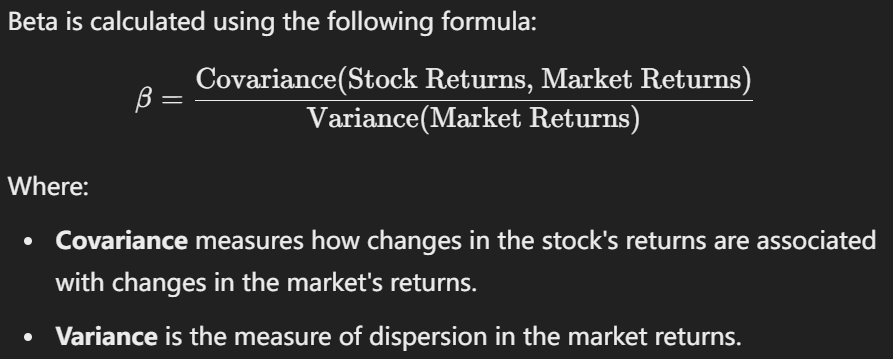

In [76]:
import pandas as pd
import numpy as np

# Example data: stock returns and market returns
# Convert the dictionary data into a DataFrame which is a 2D tabular structure where each column can be treated as a Series (a one-dimensional array).
data = {
    'stock_returns': [0.065, 0.060, -0.005, 0.034, 0.072],
    'market_returns': [0.055, 0.045, 0.002, 0.034, 0.068]
}

df = pd.DataFrame(data)
print(df)

# Calculate the covariance between stock and market
covariance = df['stock_returns'].cov(df['market_returns'])

# Calculate the variance of the market
market_variance = df['market_returns'].var()

# Calculate beta of the stock
beta = covariance / market_variance

print(f"Beta of the stock: {beta:.2f}")


   stock_returns  market_returns
0          0.065           0.055
1          0.060           0.045
2         -0.005           0.002
3          0.034           0.034
4          0.072           0.068
Beta of the stock: 1.23


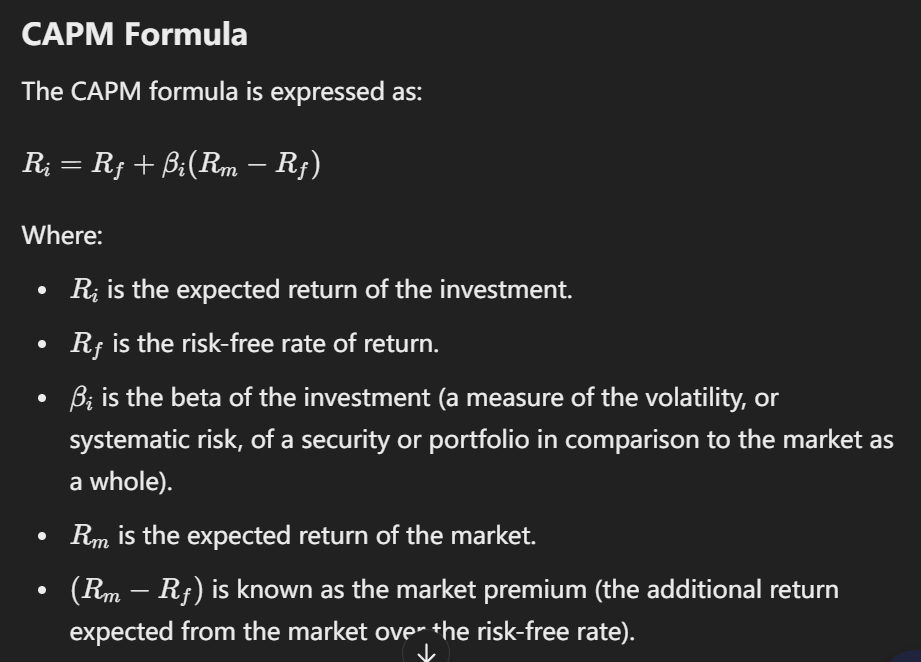

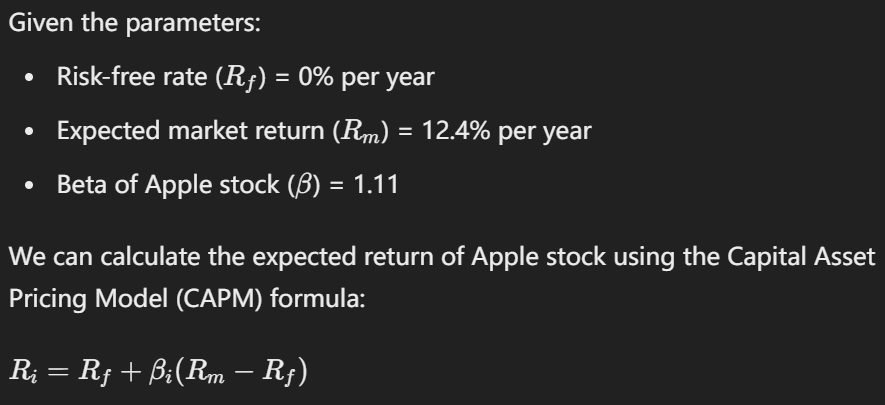

In [77]:
# Define CAPM parameters
risk_free_rate = 0.00  # Risk-free rate as 0%
beta_apple = 1.11      # Beta of Apple stock
expected_market_return = 0.124  # Expected market return as 12.4%

# CAPM formula to calculate expected return of Apple stock
expected_apple_return = risk_free_rate + beta_apple * (expected_market_return - risk_free_rate)

print(f"Expected Return for Apple Stock: {expected_apple_return * 100:.2f}%")


Expected Return for Apple Stock: 13.76%


In [78]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [79]:
file_path = r'D:\01\Python Programming Fundamentals and Practical Applications in Finance\stocks.csv'
stocks_df = pd.read_csv(file_path)
stocks_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [80]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [81]:
# Function to normalize the prices based on the initial price
def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

In [82]:
# Function to plot interactive plot
def interactive_plot(df, title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i], name = i)
    fig.show()

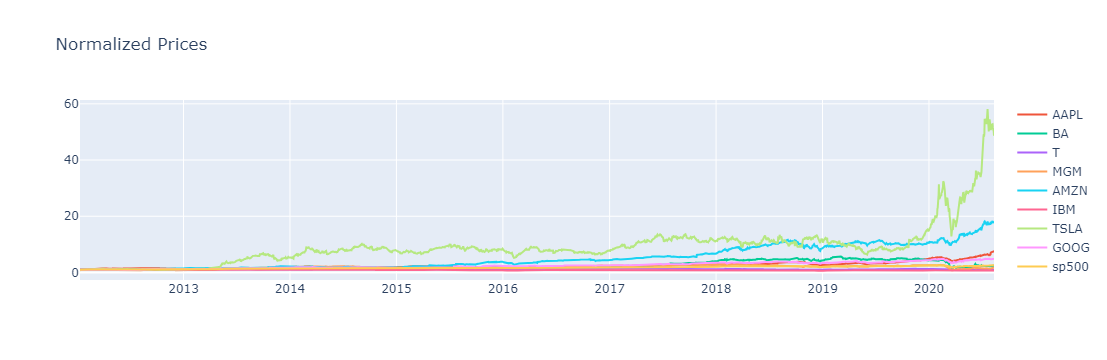

In [83]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')

In [84]:
# Function to calculate the daily returns 
def daily_return(df):

    df_daily_return = df.copy()

    # Loop through each stock
    for i in df.columns[1:]:

        # Loop through each row belonging to the stock
        for j in range(1, len(df)):

            # Calculate the percentage of change from the previous day
            df_daily_return[i][j] = ((df[i][j] - df[i][j-1])/df[i][j-1]) * 100

        # Set the value of first row to zero, as previous value is not available
        df_daily_return[i][0] = 0

    return df_daily_return

In [85]:
# Get the daily returns 
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return

Date      AAPL        BA         T        MGM      AMZN       IBM  \
0     2012-01-12  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
1     2012-01-13 -0.374946 -1.205144 -0.166006   1.813685  1.415339 -0.769869   
2     2012-01-17  1.164812  0.857909  0.598603  -0.809717  1.815943  0.468852   
3     2012-01-18  1.038382 -0.239234  0.264463   3.918367  4.282725  0.594448   
4     2012-01-19 -0.316937  0.666134  0.296736   0.549882  2.644634 -0.303752   
...          ...       ...       ...       ...        ...       ...       ...   
2154  2020-08-05  0.362467  5.579446 -0.533156   0.000000  2.109065 -0.309917   
2155  2020-08-06  3.488923 -1.193483 -0.033501  10.406699  0.623082  0.534082   
2156  2020-08-07 -2.449458 -1.265966  0.603217   3.087768 -1.784187 -0.919762   
2157  2020-08-10  1.453480  5.522880  0.599604  13.767729 -0.609323  1.720552   
2158  2020-08-11 -2.973987  0.401316  0.000000  -0.692841 -2.143792 -0.283220   

           TSLA      GOOG     sp500  
0      0.000000  0.000000  0.000000  
1    -19.327430 -0.738516 -0.494792  
2     16.717854  0.574410  0.355295  
3      0.789470  0.688856  1.110793  
4     -0.186494  1.052283  0.493866  
...         ...       ...       ...  
2154  -0.133153  0.589774  0.642974  
2155   0.307062  1.797626  0.642770  
2156  -2.475194 -0.373974  0.063303  
2157  -2.350092  0.107728  0.274222  
2158  -3.114399 -1.054744 -0.796913  

[2159 rows x 10 columns]

In [86]:
stocks_daily_return.drop('Date', axis = 1).mean()

AAPL     0.107695
BA       0.065907
T        0.008159
MGM      0.064662
AMZN     0.151122
IBM     -0.006091
TSLA     0.238398
GOOG     0.084392
sp500    0.049316
dtype: float64

In [87]:
# Select any stock, let's say Apple 
stocks_daily_return['AAPL']

0       0.000000
1      -0.374946
2       1.164812
3       1.038382
4      -0.316937
          ...   
2154    0.362467
2155    3.488923
2156   -2.449458
2157    1.453480
2158   -2.973987
Name: AAPL, Length: 2159, dtype: float64

In [88]:
# Select the S&P500 (Market)
stocks_daily_return['sp500']

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

<Axes: xlabel='sp500', ylabel='AAPL'>

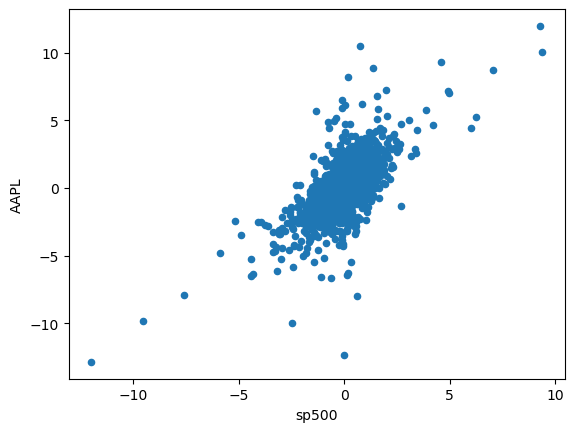

In [89]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
# Utilizing Pandas along with Matplotlib (underneath) to create a scatter plot of daily returns of two assets
# .plot() : is a wrapper around matplotlib.pyplot.plot() and supports multiple plot styles like line, bar, barh, hist, box, kde, density, area, pie, scatter, hexbin.
# A scatter plot displays the values of typically two variables using Cartesian coordinates in two dimensions.
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

In [90]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return). 
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500) 
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. 
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
# MGM is 65% more volatile than the S&P500!
# y=βx+α
# Alpha measures how much more or less the stock returns compared to what would be expected from the beta alone. 
# A positive alpha indicates a return that exceeds market returns adjusted for the risk taken
# A negative alpha indicates a return that is below expected market returns.

In [91]:
# np.polyfit: This is a function from the NumPy library, which is a fundamental package for scientific computing with Python.
# np.polyfit(x, y, deg) fits a polynomial of degree deg to points (x, y) using a least-squares approach.
# stocks_daily_return['sp500'] and stocks_daily_return['AAPL'] are passed as the x and y parameters, respectively.
# the function will treat the S&P 500 returns as the independent variable (x) and Apple's returns as the dependent variable (y).
# deg parameter: The third argument, 1, specifies the degree of the polynomial. 
# Since the deg parameter is set to 1, the function will compute a linear polynomial fit, which is essentially fitting a straight line to the data.
# The np.polyfit function returns the coefficients of the fitted polynomial. 
# For a polynomial of degree 1, these are the slope (beta) and intercept (alpha) of the line  y=βx+α.

beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('AAPL', beta, alpha))

Beta for AAPL stock is = 1.11289241486781 and alpha is = 0.05281208469440287


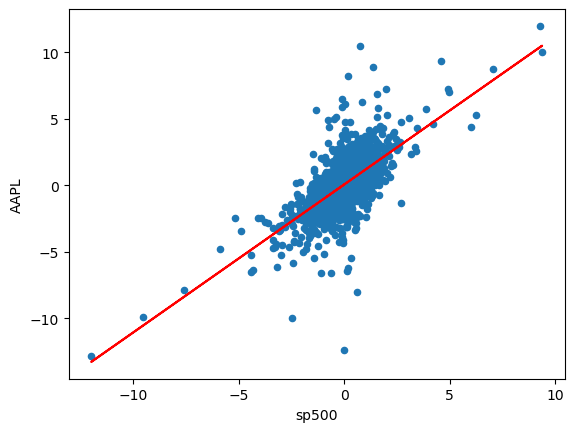

In [92]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
# beta: Is the slope of the line,
# alpha: Is the intercept, representing the expected return of AAPL when the S&P 500 return is zero
# Positive Alpha: The investment performed better than the CAPM model would predict, suggesting good management or other factors that led to outperforming the market.
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')

1.268615010109591


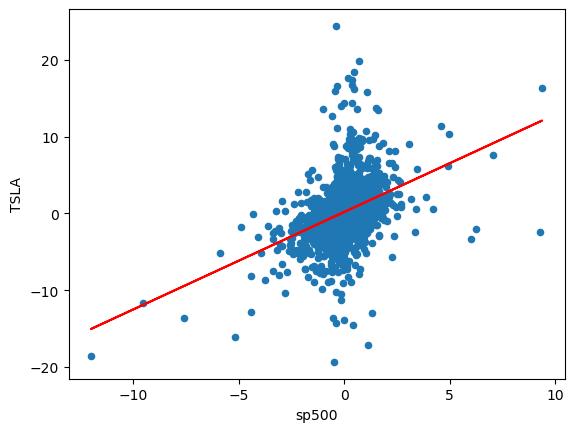

In [93]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['TSLA'], 1)
print(beta)

# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'TSLA')

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')

In [94]:
# Apply CAPM formula to calculate the return for AT&T
# Calculate Beta and alpha for Amazon first
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['T'], 1)
print(f"Beta for {'T'} stocks is = {beta:.4f} and alpha is = {alpha:.4f}")

Beta for T stocks is = 0.7446 and alpha is = -0.0286


In [95]:
# Calculate return for AT&T using CAPM 
rf = 0.00
rm = stocks_daily_return['sp500'].mean() * 252  # this is the expected return of the market 
ER_T = rf + (beta * (rm - rf))
print(f"The expected return of AT&T is {ER_T:.4F}")

The expected return of AT&T is 9.2540


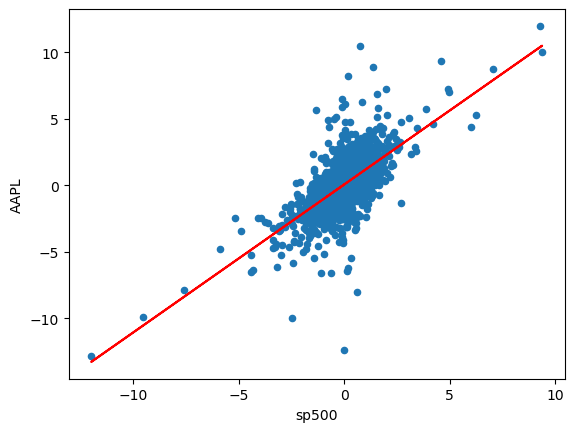

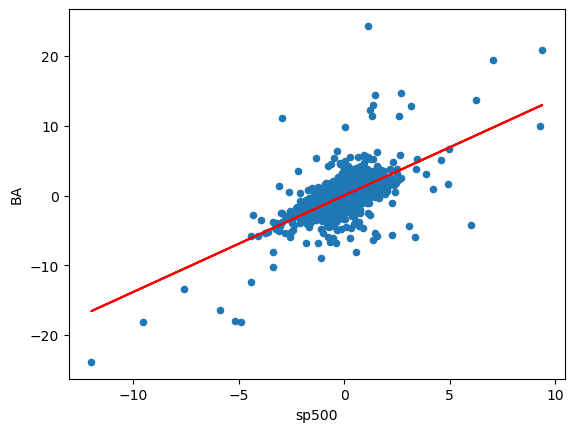

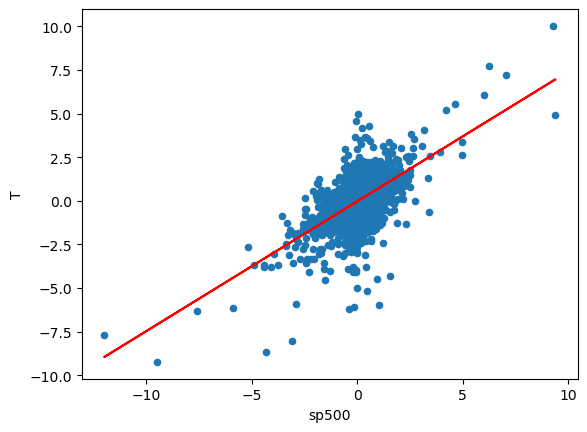

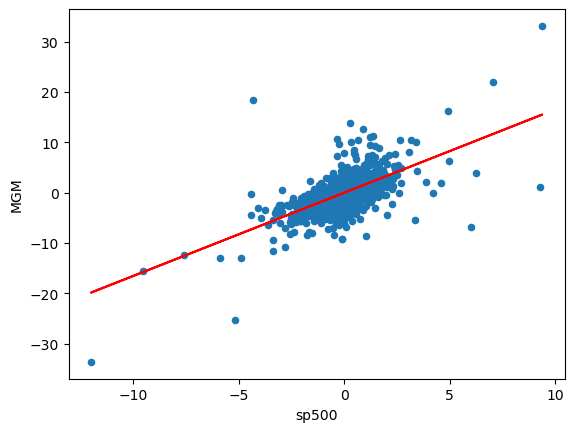

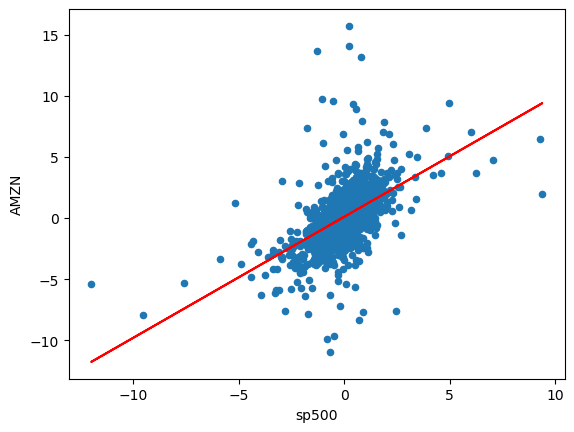

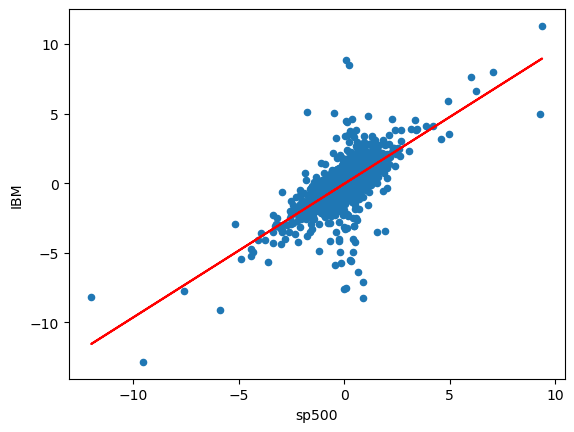

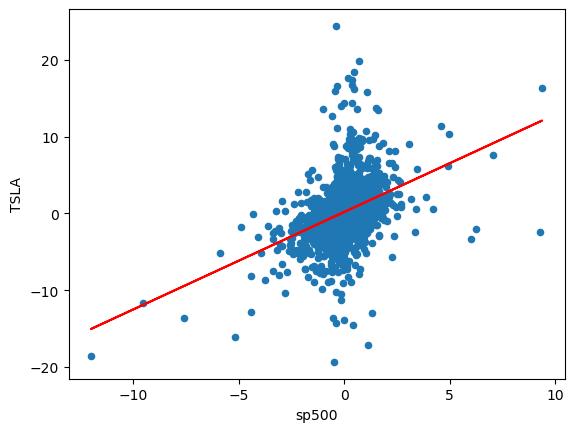

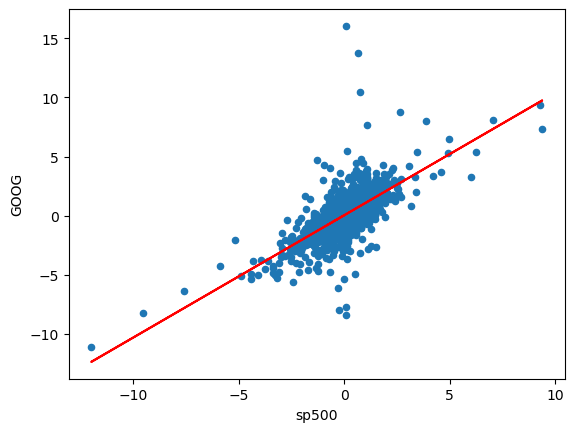

In [109]:
# CALCULATE BETA FOR ALL STOCKS
# Let's create a placeholder for all betas and alphas (empty dictionaries)
# These dictionaries will later store the beta and alpha values for each stock, with the stock's ticker symbols as keys.
beta = {}
alpha = {}

# Loop on every stock daily return
for i in stocks_daily_return.columns:

    # Ignoring the date and S&P500 columns:
    if i != 'Date' and i != 'sp500':
        # plot a scatter plot between each individual stock and the S&P500 (Market)
        stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i)

        # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
        b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)

        plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'red' )

        beta[i] = b
        
        alpha[i] = a
        
        # This command from Matplotlib displays the current figure that has been built up with the scatter plot and the line plot.
        # This is inside the loop, so it shows a separate plot for each stock relative to the S&P 500.
        plt.show()


In [97]:
# Let's view Alpha for every stock 
alpha

{'AAPL': 0.05281208469440287,
 'BA': -0.002290698329753022,
 'T': -0.028563430198461675,
 'MGM': -0.016885305520478608,
 'AMZN': 0.10221396417765237,
 'IBM': -0.05345494150445109,
 'TSLA': 0.17583492165165873,
 'GOOG': 0.03335558721467021}

In [98]:
# Let's view Beta for every stock 
beta

{'AAPL': 1.11289241486781,
 'BA': 1.3828672010892786,
 'T': 0.7446293454747845,
 'MGM': 1.6535677065180123,
 'AMZN': 0.9917345712576845,
 'IBM': 0.9604149148095246,
 'TSLA': 1.268615010109591,
 'GOOG': 1.034881768742856}

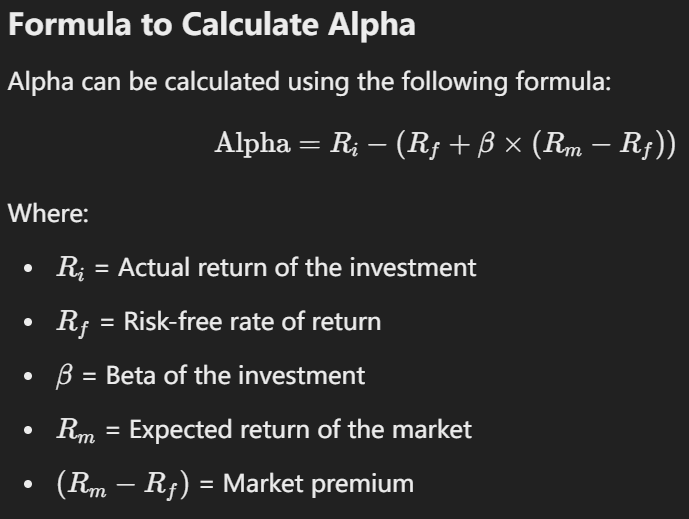

Alpha is often used to measure the active return on an investment, which is the performance that exceeds that expected from market movements alone. It's a common metric used in modern portfolio theory and is part of the Capital Asset Pricing Model (CAPM). Alpha is essentially the difference between the actual returns of the investment and the expected returns based on the CAPM (i.e., the returns predicted by the risk and beta of the investment). A positive alpha indicates that the investment has outperformed the market (adjusted for risk), whereas a negative alpha suggests underperformance.

In [114]:
# Define the variables
actual_return = 0.10  # e.g., 10%
risk_free_rate = 0.02  # e.g., 2%
beta_1 = 1.2
expected_market_return = 0.08  # e.g., 8%

# Calculate expected return using CAPM
expected_return = risk_free_rate + beta_1 * (expected_market_return - risk_free_rate)

# Calculate alpha
alpha_1 = actual_return - expected_return

print(f"Alpha: {alpha_1:.4f}")  # Format to 4 decimal places


Alpha: 0.0080


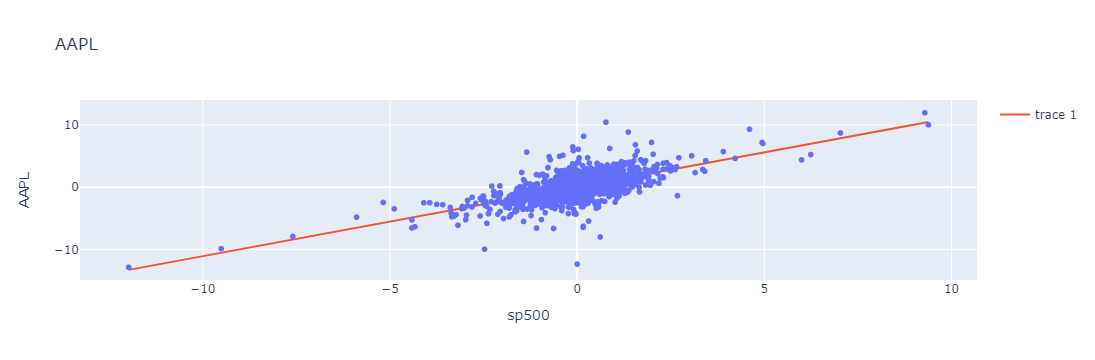

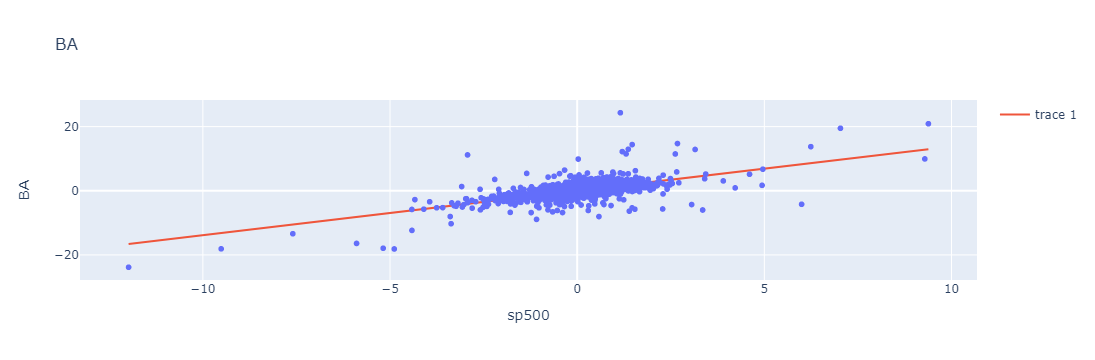

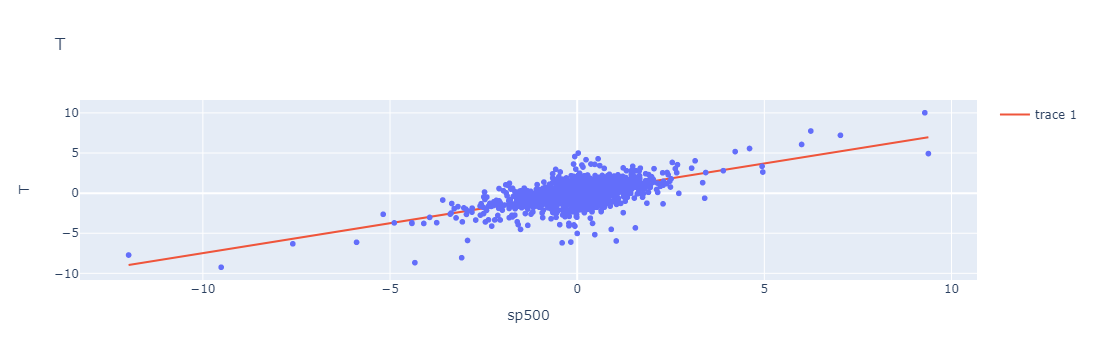

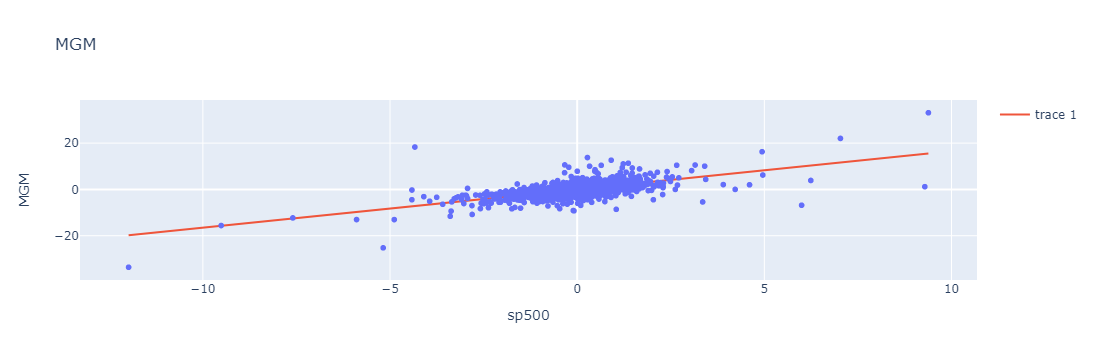

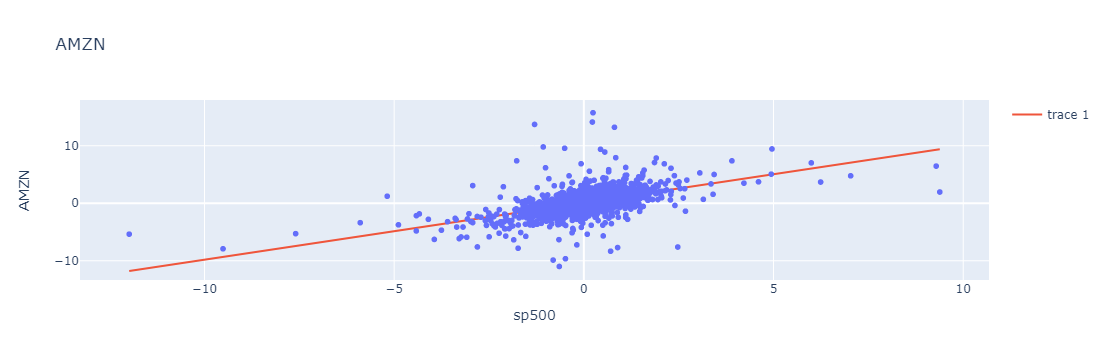

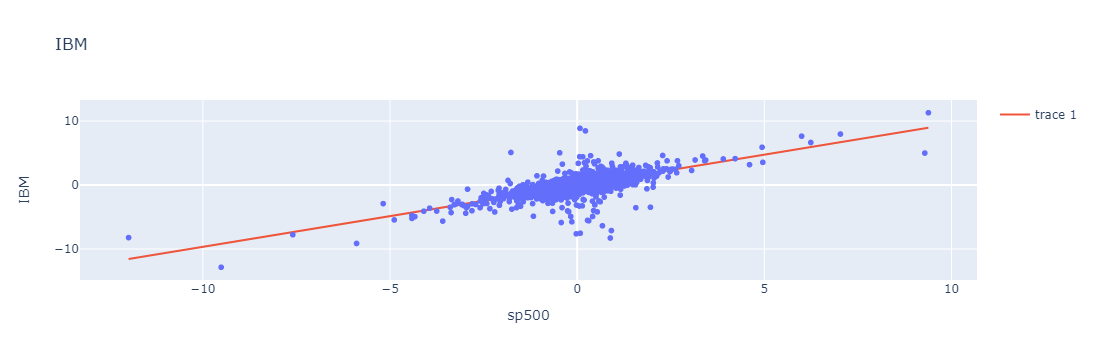

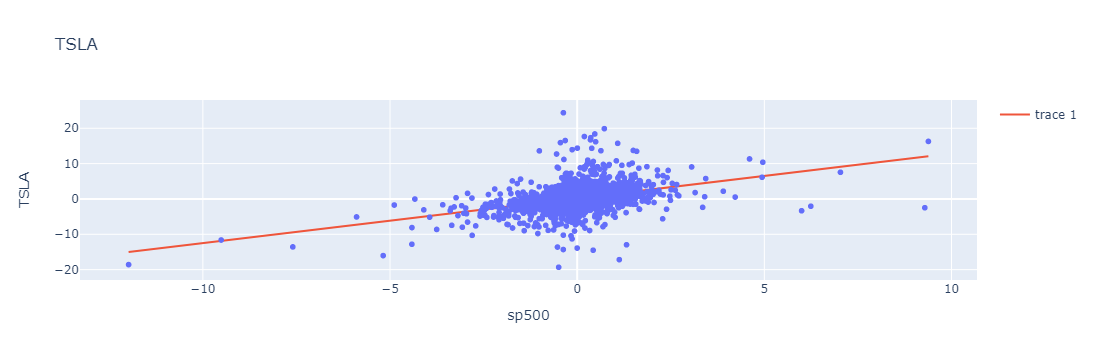

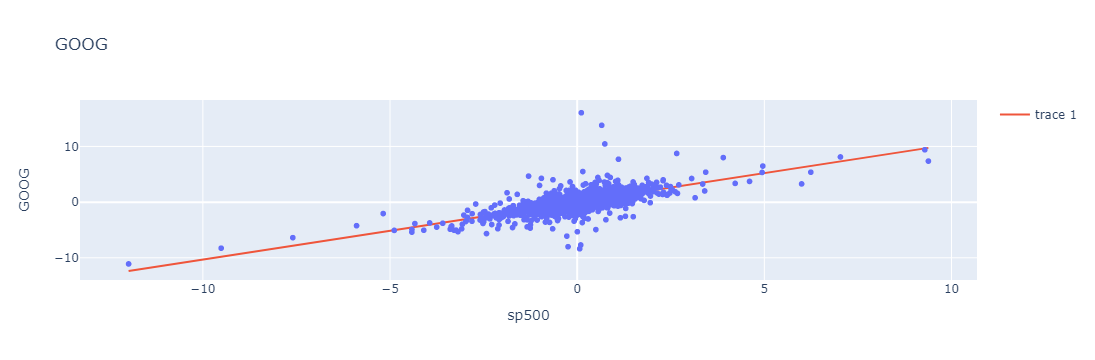

In [106]:
# Let's do the same plots but in an interactive way
# Explore some wierd points in the dataset: Tesla stock return was at 24% when the S&P500 return was -0.3%!

for i in stocks_daily_return.columns:

    if i != 'Date' and i != 'sp500':

        # Use plotly express to plot the scatter plot for every stock vs. the S&P500
        fig = px.scatter(stocks_daily_return, x = 'sp500', y = i, title = i)

        # Fit a straight line to the data and obtain beta and alpha
        # This function returns the coefficients of the line, b (slope or beta) and a (intercept or alpha). 
        b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)

        # Plot the straight line
        fig.add_scatter(x = stocks_daily_return['sp500'], y = b * stocks_daily_return['sp500'] + a)
        fig.show()
    


APPLY CAPM FORMULA TO CALCULATE THE RETURN FOR THE PORTFOLIO

In [110]:
# Obtain a list of all stock names
keys = list(beta.keys())
keys

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

In [111]:
# Define the expected return dictionary
ER = {}

rf = 0 # Assume risk free rate is zero in this case
rm = stocks_daily_return['sp500'].mean() * 252 # this is the expected return of the market 

rm


12.427633663298055

In [113]:
for i in keys:
    # Calculate return for every security using CAPM
    ER[i] = rf + ( beta[i] * (rm - rf))
ER

{'AAPL': 13.830619238640262,
 'BA': 17.18576698012788,
 'T': 9.25398072050203,
 'MGM': 20.549933694065807,
 'AMZN': 12.324913942818464,
 'IBM': 11.935684726020382,
 'TSLA': 15.765882605403155,
 'GOOG': 12.861131506762149}

In [116]:
for i in keys:
    print(f"Expected Return Based on CAPM for {i} is {ER[i]:.4f}")

Expected Return Based on CAPM for AAPL is 13.8306
Expected Return Based on CAPM for BA is 17.1858
Expected Return Based on CAPM for T is 9.2540
Expected Return Based on CAPM for MGM is 20.5499
Expected Return Based on CAPM for AMZN is 12.3249
Expected Return Based on CAPM for IBM is 11.9357
Expected Return Based on CAPM for TSLA is 15.7659
Expected Return Based on CAPM for GOOG is 12.8611


In [117]:
# Assume equal weights in the portfolio

# np.ones() is a function from the NumPy library that generates a new array filled entirely with ones.
# The argument 8 specifies the size of the array. So, np.ones(8) creates an array with 8 elements, all of which are 1.0
# Example Output: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
portfolio_weights = 1/8 * np.ones(8)
portfolio_weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [119]:
# Calculate the portfolio return

ER_portfolio = sum(list(ER.values()) * portfolio_weights)
ER_portfolio

14.213489176792516

In [122]:
print(f'Expected Return Based on CAPM for the portfolio is {ER_portfolio:.4f}%\n')

Expected Return Based on CAPM for the portfolio is 14.2135%



Calculate the expected return for the portfolio assuming we only have 50% allocation in Apple and 50% in Amazon

In [123]:
ER['AMZN']

12.324913942818464

In [125]:
# Calculate the portfolio return 
ER_portfolio = 0.5 * ER['AAPL'] + 0.5 * ER['AMZN']
print(f'Expected Return Based on CAPM for the portfolio is {ER_portfolio:.4f}%\n')

Expected Return Based on CAPM for the portfolio is 13.0778%

